In [22]:
import pandas as pd

In [23]:
StormEvents = pd.read_csv('../data/StormEvents_details-ftp_v1.0_d2017_c20190516.csv')
SevereWeatherDatabase = pd.read_csv('../data/2017_torn.csv')

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

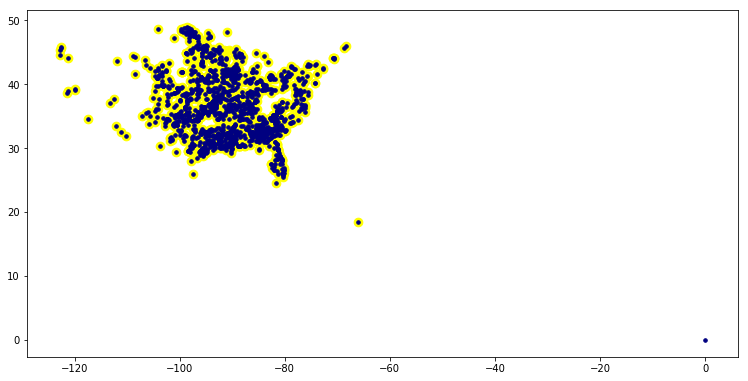

In [107]:
StormEvents = StormEvents[StormEvents['EVENT_TYPE'] == 'Tornado'].reset_index()
plt.figure(figsize = (17*3/4, 8.5*3/4))
plt.scatter(y = StormEvents['BEGIN_LAT'], x = StormEvents['BEGIN_LON'],
            color = 'yellow', marker = 'o', s=75)
plt.scatter(y = SevereWeatherDatabase['slat'], x = SevereWeatherDatabase['slon'],
            color = 'navy', marker = '.', s= 50);

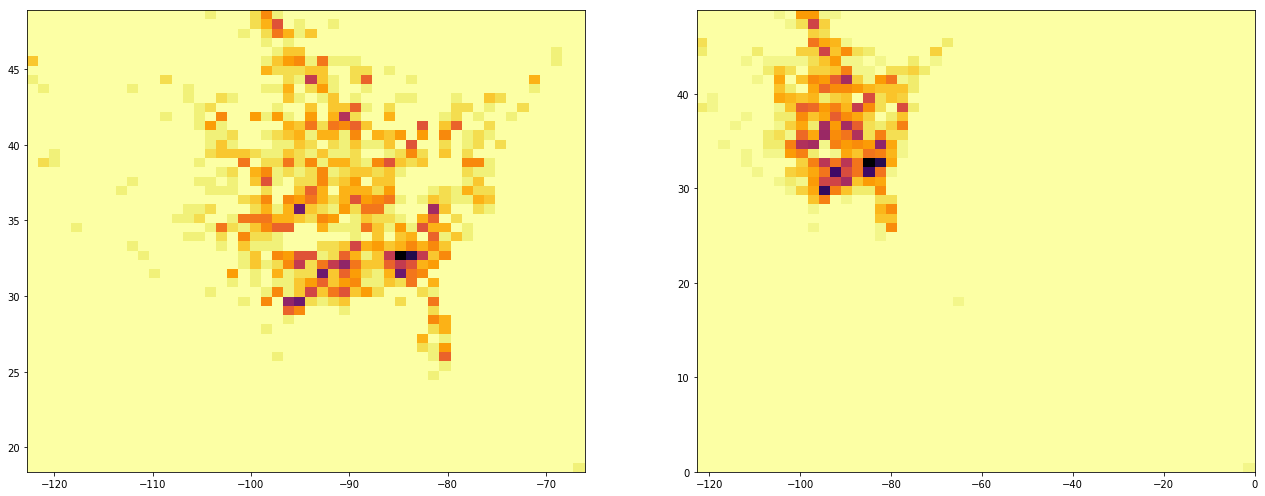

In [27]:
f, axarr = plt.subplots(1,2)
f.set_figheight(8.5)
f.set_figwidth(22)

a = axarr[0].hist2d(y = StormEvents['BEGIN_LAT'], 
                    x = StormEvents['BEGIN_LON'],
                    bins = 50, cmap = 'inferno_r')
b = axarr[1].hist2d(y = SevereWeatherDatabase['slat'],
                    x = SevereWeatherDatabase['slon'],
                    bins = 50, cmap = 'inferno_r')

In [28]:
import plotly
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs import *

In [29]:
plotly.offline.init_notebook_mode(connected=True)

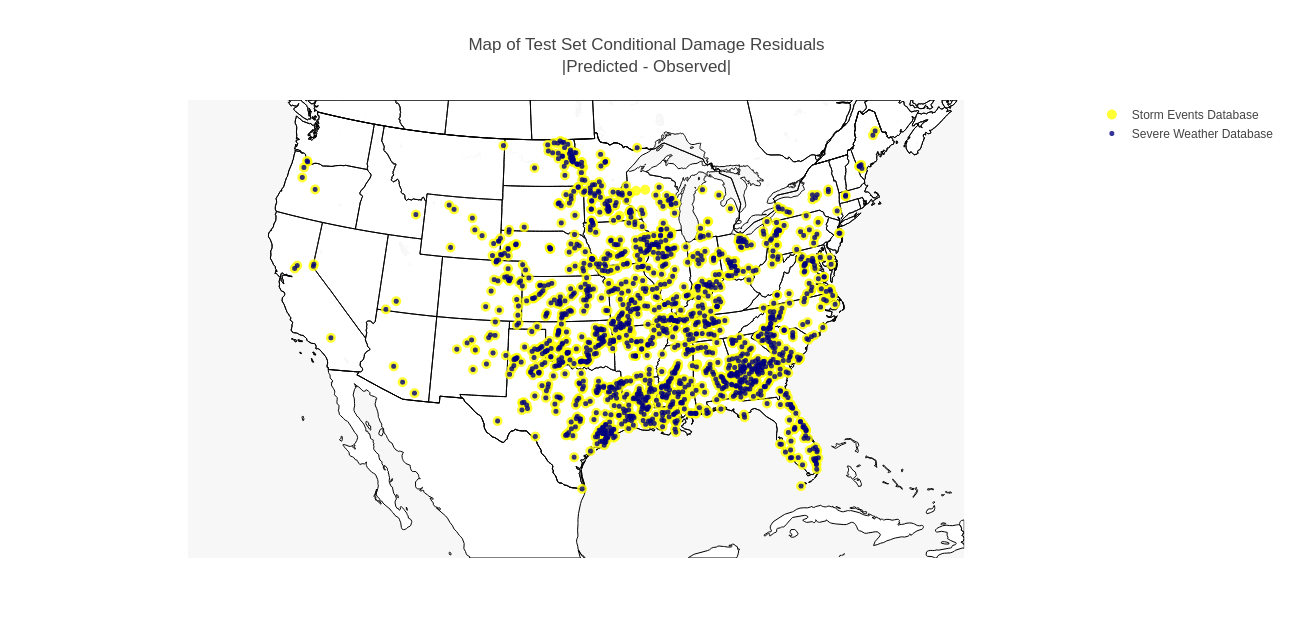

In [131]:
trace1 = plotly.graph_objs.Scattergeo(
        lon = StormEvents['BEGIN_LON'],
        lat = StormEvents['BEGIN_LAT'],
        text = StormEvents['DAMAGE_PROPERTY'],
        mode = 'markers',
        marker = dict( 
            size = 10, 
            opacity = 0.8,
            color = 'yellow'),
        name = 'Storm Events Database')
trace2 = plotly.graph_objs.Scattergeo(
        lon = SevereWeatherDatabase['slon'],
        lat = SevereWeatherDatabase['slat'],
        text = SevereWeatherDatabase['loss'],
        mode = 'markers',
        marker = dict( 
            size = 5, 
            opacity = 0.8,
            color = 'navy'),
        name = 'Severe Weather Database')

layout = dict(geo = dict(scope = 'north america',
                         showland = True,
                         landcolor = "rgb(255, 255, 255)",
                         subunitcolor = "rgb(0, 0, 0)",
                         countrycolor = "rgb(0, 0, 0)",
                         showlakes = True,
                         showocean = True,
                         lakecolor = "rgb(247, 247, 247)",
                         oceancolor = "rgb(247, 247, 247)",
                         showsubunits = True,
                         showcountries = True,
                         resolution = 50,
                         lonaxis = dict(showgrid = True,
                                        gridwidth = 0.05,
                                        range= [-125.0, -70.0],
                                        dtick = 5),
                         lataxis = dict(showgrid = True,
                                        gridwidth = 0.05,
                                        range= [23.0, 50.0],
                                        dtick = 5)),
              title = 'Map of Test Set Conditional Damage Residuals<br>|Predicted - Observed|',
              autosize = False,
              width = 1100*3/4, height = 850*3/4)

data = [trace1, trace2]

fig = plotly.graph_objs.Figure(data=data, layout=layout )
plotly.offline.iplot(fig)

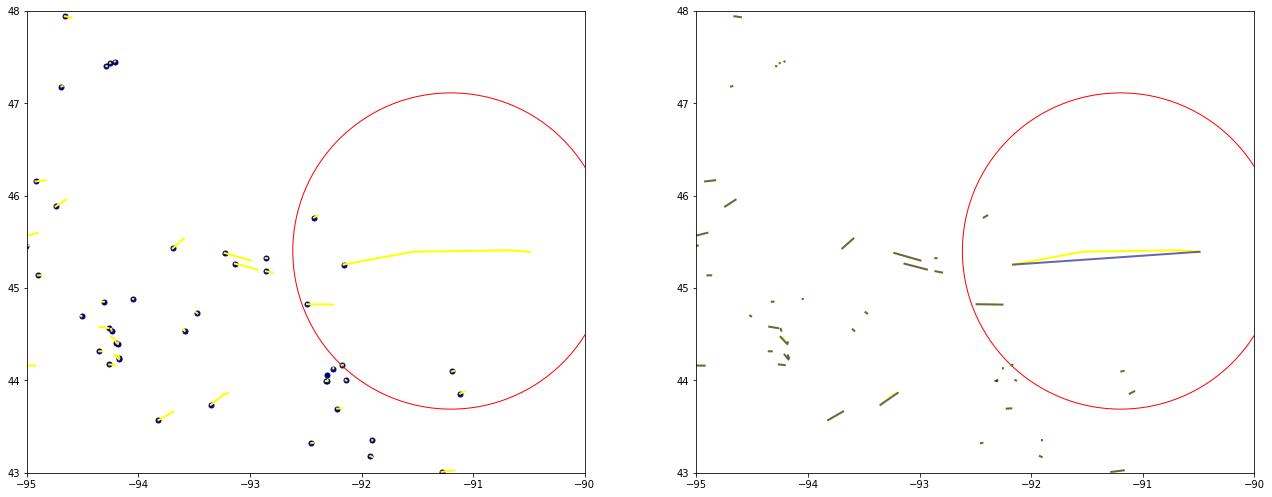

In [147]:
f, axarr = plt.subplots(1,2)
f.set_figheight(8.5)
f.set_figwidth(22)

for i in range(len(StormEvents)):
    axarr[0].plot([StormEvents['BEGIN_LON'][i], StormEvents['END_LON'][i]],
             [StormEvents['BEGIN_LAT'][i], StormEvents['END_LAT'][i]], color = 'yellow',
             linewidth = 2)
axarr[0].scatter(SevereWeatherDatabase['slon'], SevereWeatherDatabase['slat'],
            marker = '.', color = 'navy', s = 100)
axarr[0].scatter(-91.2, 45.4, s = 100000, marker = 'o', edgecolor = 'red', color = 'none')
axarr[0].set_xlim(-95, -90)
axarr[0].set_ylim(43, 48)

for i in range(len(StormEvents)):
    axarr[1].plot([StormEvents['BEGIN_LON'][i], StormEvents['END_LON'][i]],
                  [StormEvents['BEGIN_LAT'][i], StormEvents['END_LAT'][i]],
                  color = 'yellow', linewidth = 2)
for i in range(len(SevereWeatherDatabase)):
    axarr[1].plot([SevereWeatherDatabase['slon'][i], SevereWeatherDatabase['elon'][i]],
                  [SevereWeatherDatabase['slat'][i], SevereWeatherDatabase['elat'][i]],
                  color = 'navy', linewidth = 2, alpha = 0.6)
axarr[1].scatter(-91.2, 45.4, s = 100000, marker = 'o', edgecolor = 'red', color = 'none')
axarr[1].set_xlim(-95, -90)
axarr[1].set_ylim(43, 48);

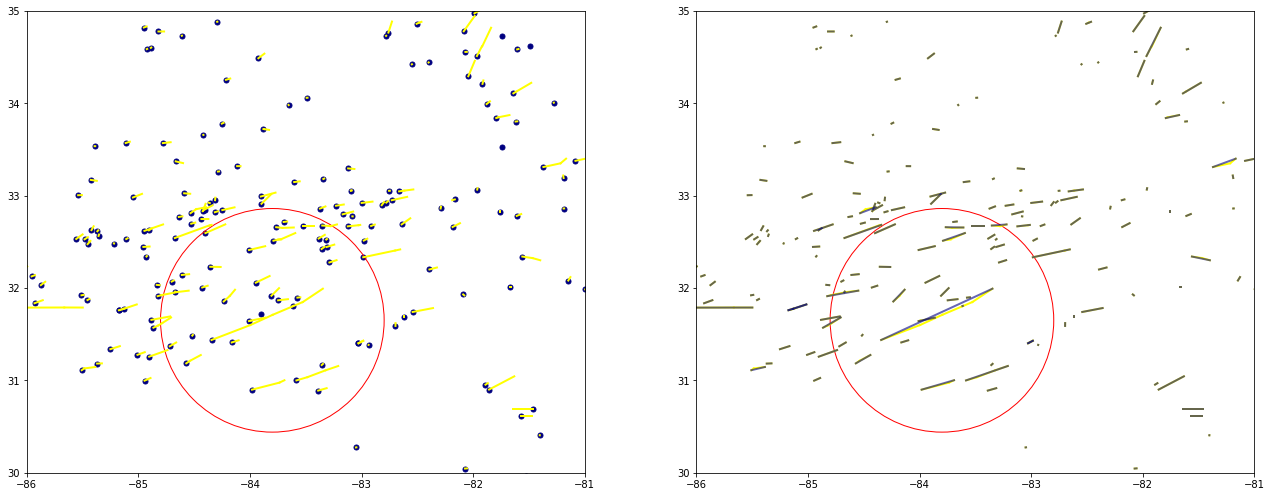

In [152]:
f, axarr = plt.subplots(1,2)
f.set_figheight(8.5)
f.set_figwidth(22)

for i in range(len(StormEvents)):
    axarr[0].plot([StormEvents['BEGIN_LON'][i], StormEvents['END_LON'][i]],
             [StormEvents['BEGIN_LAT'][i], StormEvents['END_LAT'][i]], color = 'yellow',
             linewidth = 2)
axarr[0].scatter(SevereWeatherDatabase['slon'], SevereWeatherDatabase['slat'],
            marker = '.', color = 'navy', s = 100)
axarr[0].set_xlim(-86, -81)
axarr[0].set_ylim(30, 35)
axarr[0].scatter(-83.8, 31.65, s = 50000, marker = 'o', edgecolor = 'red', color = 'none')

for i in range(len(StormEvents)):
    axarr[1].plot([StormEvents['BEGIN_LON'][i], StormEvents['END_LON'][i]],
             [StormEvents['BEGIN_LAT'][i], StormEvents['END_LAT'][i]],
             color = 'yellow', linewidth = 2)
for i in range(len(SevereWeatherDatabase)):
    axarr[1].plot([SevereWeatherDatabase['slon'][i], SevereWeatherDatabase['elon'][i]],
             [SevereWeatherDatabase['slat'][i], SevereWeatherDatabase['elat'][i]],
             color = 'navy', linewidth = 2, alpha = 0.6)
axarr[1].set_xlim(-86, -81)
axarr[1].set_ylim(30, 35)
axarr[1].scatter(-83.8, 31.65, s = 50000, marker = 'o', edgecolor = 'red', color = 'none');